In [49]:
import re
import pandas as pd
from pathlib import Path
from pythainlp.tokenize import word_tokenize
from tqdm import tqdm_notebook
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import string
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

pd.set_option("max_colwidth", 0)

%matplotlib inline
plt.rcParams['font.family'] = 'TH Sarabun New' 

# Reading data

In [50]:
data_folder = Path("exploration/")

In [51]:
texts = []
labels = []

df=pd.read_csv(data_folder / "train.csv")

In [52]:
df.shape

(24063, 2)

In [53]:
df.head()

category                                              texts
0  neu      ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
1  neu      คะ                                               
2  neg      อิเหี้ยออมทำกูอยากกินเอ็มเค                      
3  neu      😅😅😅                                              
4  neu      สวัสดีวันพุธ แนน อะไรนะ

In [54]:
test_df=pd.read_csv(data_folder / "test.csv")
test_df.shape

(2674, 2)

In [55]:
test_df.head()

category  \
0  neu       
1  neu       
2  neu       
3  neu       
4  neu       

                                                                                texts  
0  ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไม่ได้                                 
1  ครับ #phithanbkk                                                                    
2  การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเอส (รถไฟฟ้า) มันสำนึกมั้ย ก็ไม่อ่ะ 😕  
3  Cf clarins 5 ขวด 2850                                                               
4  ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขาว เกลือ แลน้ำตาลค่ะ

In [56]:
df.describe()

category    texts
count   24063    24063  
unique  4        24014  
top     neu      #ERROR!
freq    13105    31

In [57]:
df.groupby("category").describe()

texts         \
          count unique   
category                 
neg       6140   6129    
neu       13105  13087   
pos       4300   4300    
q         518    518     

                                                                                       \
                                                                                  top   
category                                                                                
neg       #ERROR!                                                                       
neu       #ERROR!                                                                       
pos       สนใจ ฟอจูนเนอร์ สีขาวครับ                                                     
q         นิสสัน suv ที่เพิ่งเปิดตัวที่ฟิลิบปินส์เป็นไงบ้างครับ สมรรถภาพ มาไทยเมื่อไร   

               
         freq  
category       
neg       12   
neu       19   
pos       1    
q         1

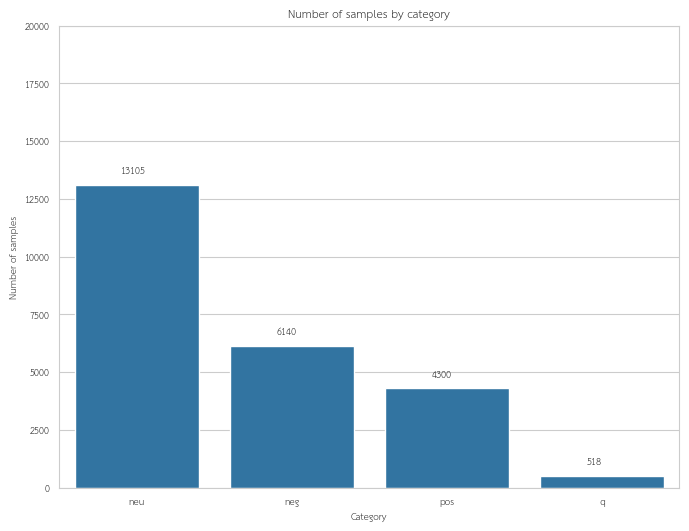

In [58]:
row_count_by_category = df.category.value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=row_count_by_category.index, y=row_count_by_category.values)
ax.set_title("Number of samples by category")
ax.set_xlabel("Category")
ax.set_ylabel("Number of samples")  
ax.set_ylim(0, 20000)
for i, label in enumerate(row_count_by_category):
    ax.annotate(str(label), (i-0.1, label + 500))

# Text length

In [59]:
df["length"] = df["texts"].apply(word_tokenize).apply(len)
df.head()

category                                              texts  length
0  neu      ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ  13    
1  neu      คะ                                                 1     
2  neg      อิเหี้ยออมทำกูอยากกินเอ็มเค                        9     
3  neu      😅😅😅                                                1     
4  neu      สวัสดีวันพุธ แนน อะไรนะ                            8

In [60]:
df["length"].describe()

count    24063.000000
mean     26.455554   
std      43.032202   
min      1.000000    
25%      6.000000    
50%      12.000000   
75%      29.000000   
max      731.000000  
Name: length, dtype: float64

In [61]:
df[df["length"] >= 731]

category  \
5889  neu       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               texts  \
5889  และงานใหญ่ประจำปี บ้ตร sold out ทุกปี - ขายบัตรแล้ว!! พร้อมเพิ่มวง LIPTA - ถึงเวลารวม ชนเผ่า Johnnie Walker present 20Something On The Beach 2018 "ชน เผ่า เมา เต้น" ▶ THAITANIUM ▶ UrboyTJ ▶ COCKTAIL ▶ MILD ▶ LIPTA ▶ MUSKETEERS X BETTERWEATHER ▶ บริษัทฮาไม่จำกัด (บอล,ค่อม,ตั๊ก,โรเบิร์ต สายควัน) ▶ Dj Taidy Dj MMM Mc YongHulk ▶ GiraffNoi / RAVEN DOLL PARTY แบบ nonstop ไม่มี dead air DJ สลับ ศิลปินตลอดงาน @The Zign pattaya Sat 03/03/2018 16.00 - until late AGE : 18+ Dress Code : ชนเผ่า ----------------------------------------------- งานแบ่งเป็น 2 zone * Zone Regular : อยู่ด้านหลังไม่ติดเวที มีโต๊ะให้บางส่วน ไม่มีการจอง มาก่อนได้ก่อน ไม่ได้มีพอกับทุกคน เข้า zone vip ไม่ได้ (บัตรทุกราคา free mixer all night) * Regular Ticket - Pre sale : 900 ฿ - Door sale : 1,200 ฿ * Regular Package : 4,900฿ (ไม่มีบุ๊คโต๊ะ ไปก่อนได้ก่อน) - ห้องพัก the zign 1 ห้อง - บัตร regular 2 ใบ - บัตรอาหารเช้า 2 ท่าน — *Zone VIP : อยู่ด้านหน้าติดเวที Zone นี้ทุกโต๊ะจะต้องจองเท่านั้น สำหรับคนที่ ซื้อบัตร vip แยกเป็นใบๆ ต้องมีเพื่อนจองโต๊ะแล้วเท่านั้น ไม่งั้นเข้าไป คุณจะไม่มีโต๊ะ * VIP Ticket (limited) - 1,500 ฿ * VIP Package A : 15,000 ฿ (มีบุ๊คโต๊ะ) - ห้องพัก the zign 1 ห้อง - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch 2 ขวด - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน * VIP Package B : 12,000 ฿ (มีบุ๊คโต๊ะ) (สำหรับคนไม่เอาห้อง) - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night * VIP Package C : 6,100 ฿ (ไม่มีบุ๊คโต๊ะ) (สำหรับคนที่เพื่อนซื้อโต๊ะแล้ว) - ห้องพัก the zign 1 ห้อง - บัตร vip 2 ใบ - VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน ----------------------------------------------- ซื้อบัตรคลิก : http://go.eventpop.me/20STHONTHEBEACH2018 ซื้อบัตรกับทางร้าน (เฉพาะโต๊ะ vip zone ครึ่งหลัง) LINE@20sth : https://goo.gl/ujgAK4 Party by "20STH TEAM" #20somethingonthebeach2018 #20somethingonthebeach #ชนเ

### Word length distribution

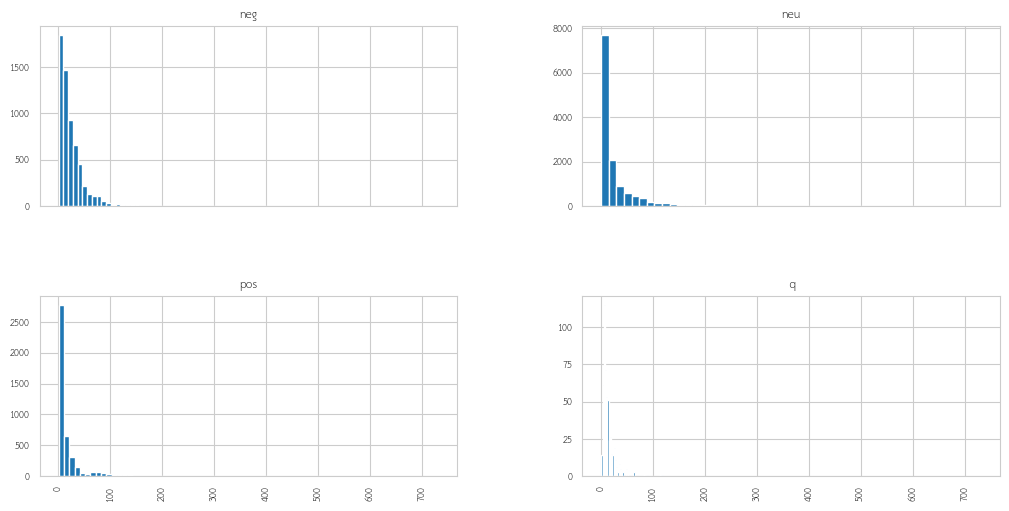

In [62]:
df.hist(column="length", by="category", bins=50, figsize=(12,6), sharex=True)
plt.show()

### Word length distribution that < 100

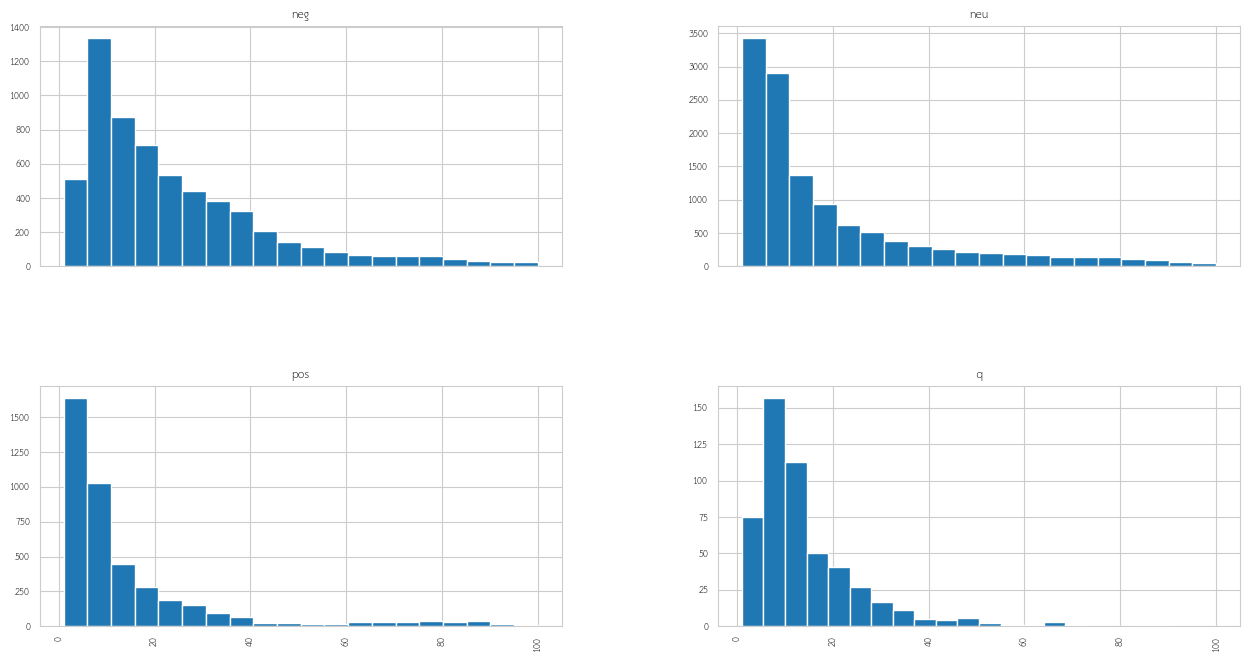

In [63]:
df[df["length"] <= 100].hist(column="length", by="category", bins=20, figsize=(15,8), sharex=True)
plt.show()

In [64]:
print(df.head())

  category                                              texts  length
0  neu      ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ  13    
1  neu      คะ                                                 1     
2  neg      อิเหี้ยออมทำกูอยากกินเอ็มเค                        9     
3  neu      😅😅😅                                                1     
4  neu      สวัสดีวันพุธ แนน อะไรนะ                            8     


# Preprocess

In [65]:
def top_feats(row, features, top_n=25):
    """ Get top n features from a row of coefficients and a list of feature names. """
    top_n_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in top_n_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ["feature", "score"]
    return df

In [66]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    """ Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. """
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_feats(tfidf_means, features, top_n)

In [67]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    """Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label."""
    dfs = []
    labels = np.unique(y)

    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)

    return dfs

In [68]:
def plot_classfeats_h(dfs, score_name=''):
    
    import seaborn as sns
    sns.set_style("whitegrid")
    
    plt.rcParams['font.family'] = 'TH Sarabun New'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize=(18, 10), facecolor="white", dpi=150)
    
    palette = sns.color_palette("husl", len(dfs))
    
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        x = np.arange(len(df))
        
        bars = ax.barh(x, df.score, 
                      color=palette[i], 
                      alpha=0.85,
                      edgecolor='none')
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.tick_params(left=False)
        
        ax.xaxis.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        ax.set_axisbelow(True)
        
        ax.set_title(f"{df.label.upper()}", 
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel(f"TF-IDF Score", fontsize=12, fontweight='600', labelpad=10)
        
        ax.set_yticks(x)
        ax.set_yticklabels(df.feature, fontsize=13, fontweight='500')
        ax.set_ylim([-0.5, len(df)-0.5])
        ax.invert_yaxis()
        
        ax.ticklabel_format(axis='x', style='plain')
        ax.tick_params(axis='x', labelsize=10)
        
    plt.tight_layout(pad=2.0)
    plt.show()

In [69]:
def show_classfeats(df, vectorizer, analyzer, score_name='', text_col='texts', class_col='category', is_emoji=False):
    vec = vectorizer(analyzer=analyzer)
    mat = vec.fit_transform(df[text_col])
    dfs = top_feats_by_class(mat, df[class_col], vec.get_feature_names_out())  # Changed to get_feature_names_out()

    if is_emoji:
        for dataframe in dfs:
            dataframe.columns = [dataframe.label, 'tfidf_' + str(dataframe.label)]
        return pd.concat(dfs, axis=1)
    else:
        plot_classfeats_h(dfs, score_name=score_name)

In [70]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return [word for word in word_tokenize(nopunc) if word and not re.search(pattern=r"\s+", string=word)]

def extract_url(text):
    URL_PATTERN = r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S"
    return [url[1] for url in re.findall(pattern=URL_PATTERN, string=text.lower())]

def extract_emojis(text):
    return [c for c in text if c in emoji.EMOJI_DATA]

def extract_punc(text):
    return [char for char in text if char in string.punctuation]

def extract_hashtags(text):
    HASHTAG_PATTERN = r"#[a-zA-Z0-9ก-๙]+"
    return re.findall(pattern=HASHTAG_PATTERN, string=text)

## TF-IDF

### Words

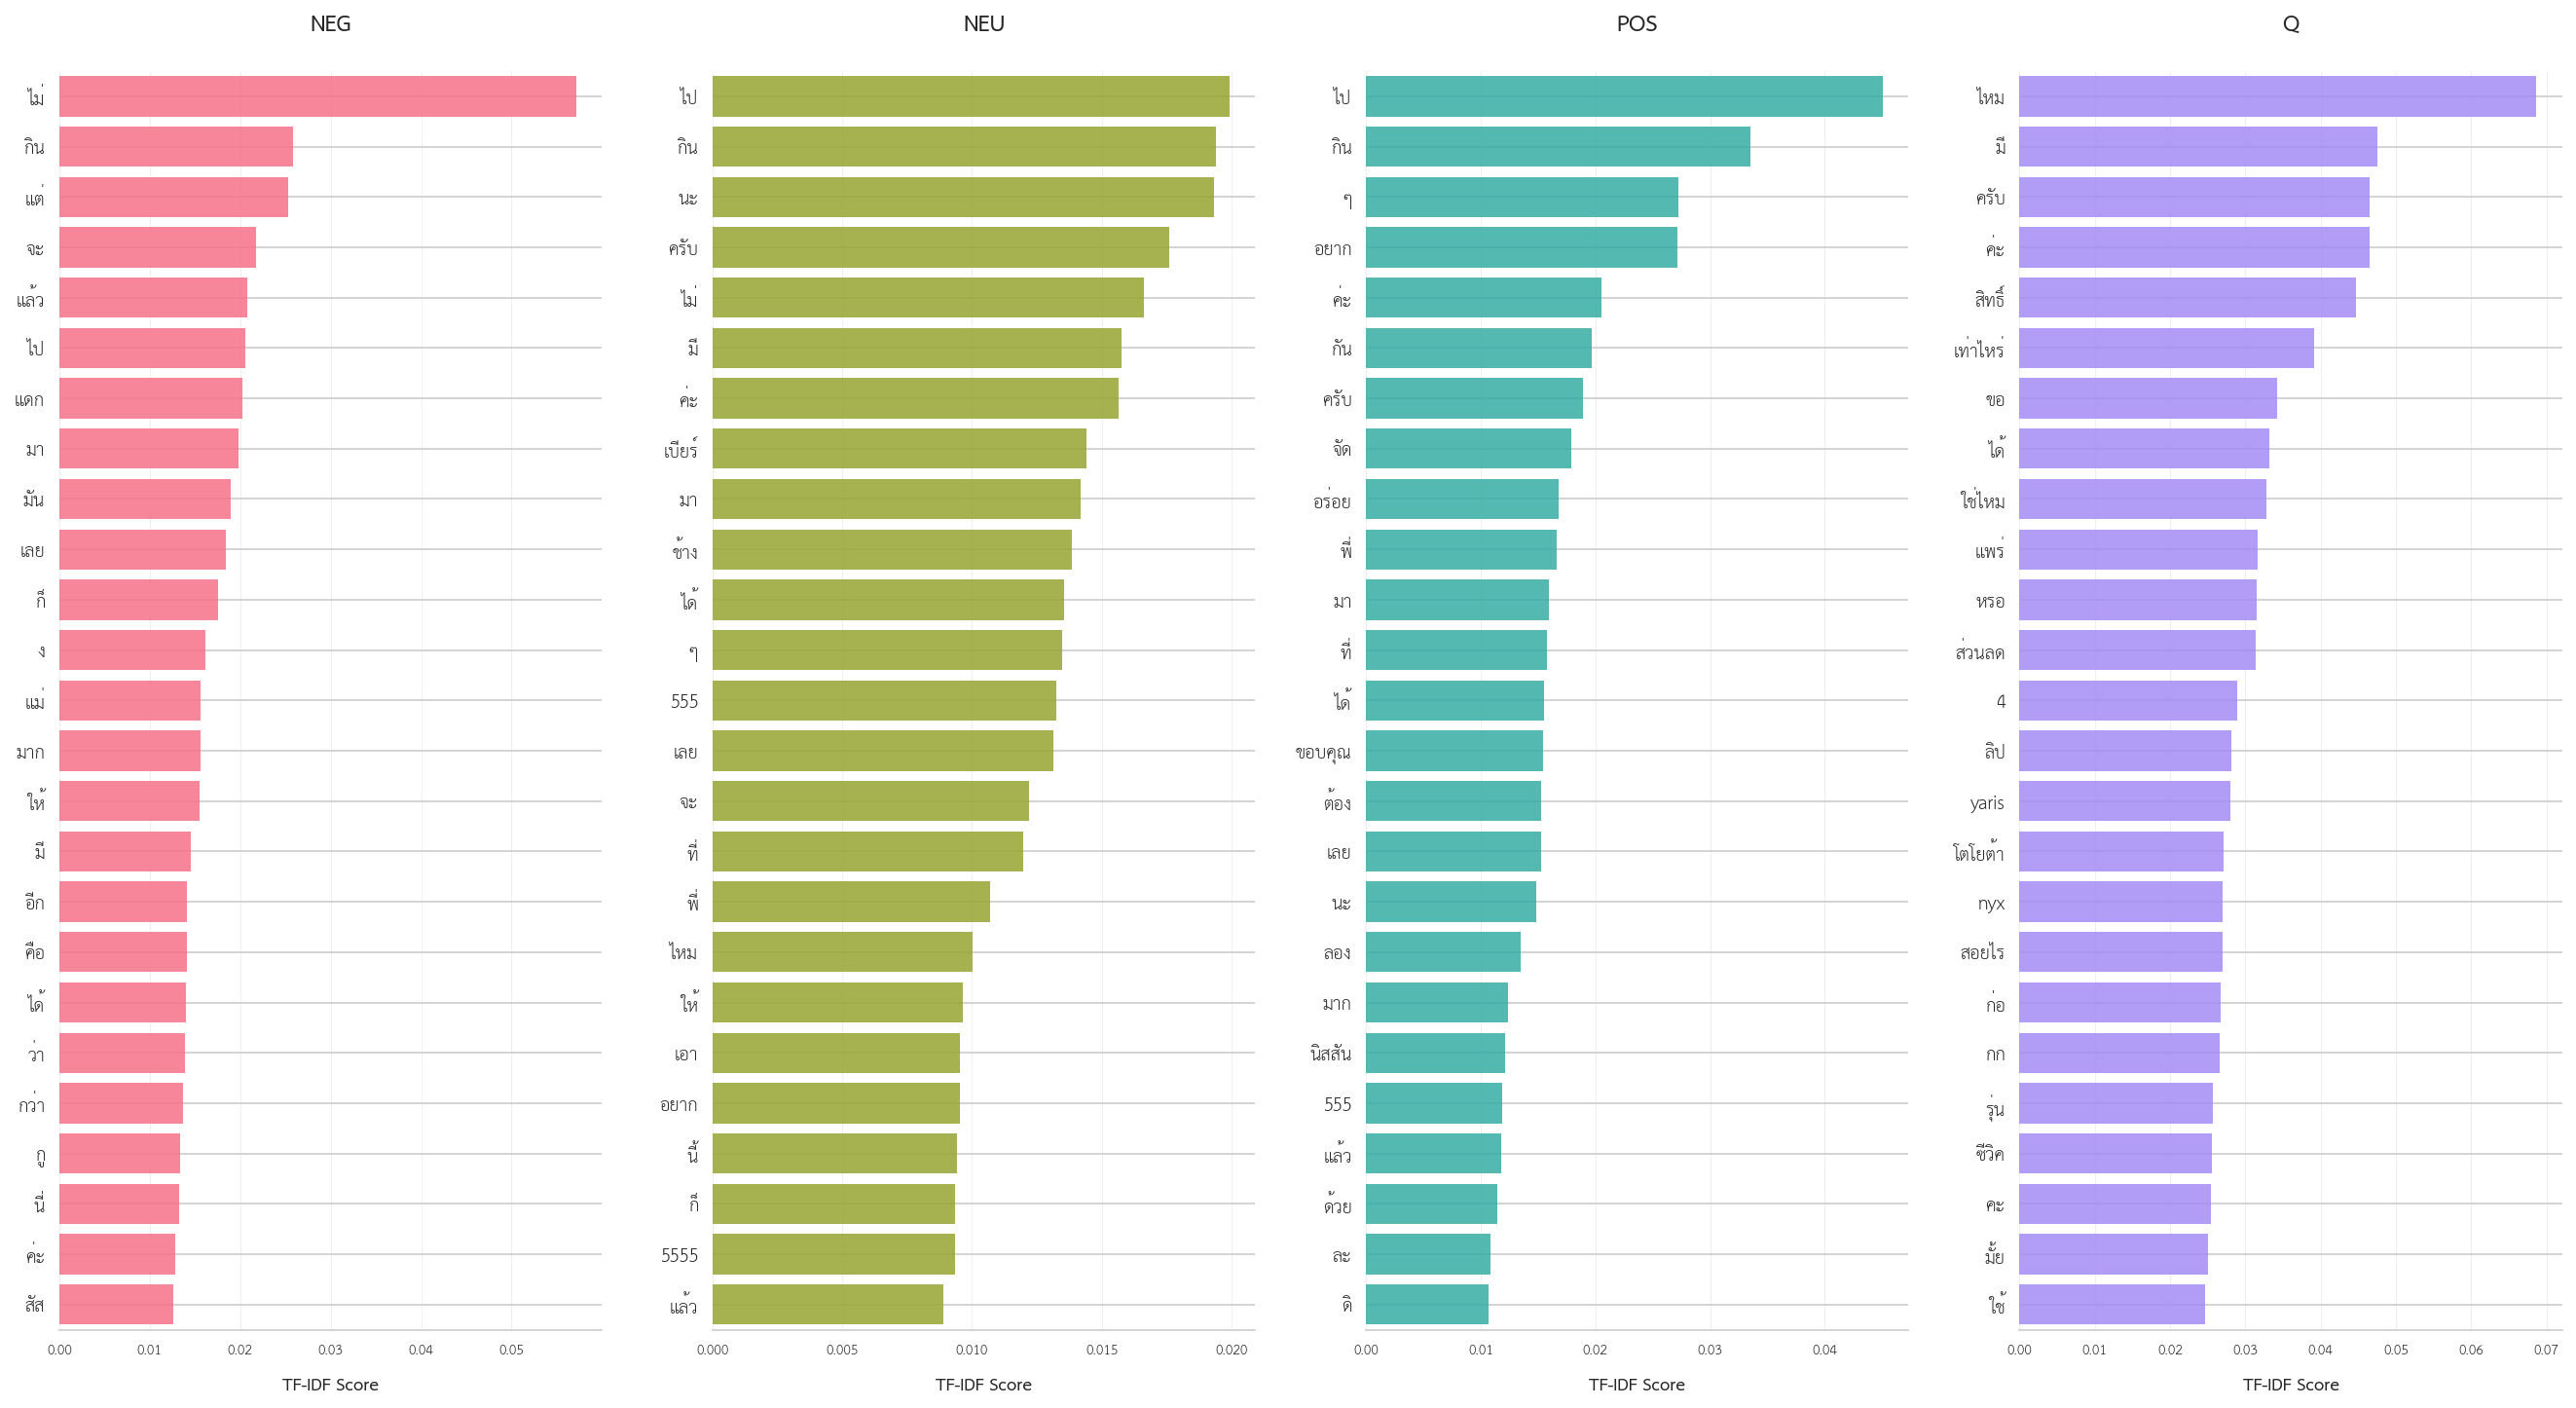

In [71]:
show_classfeats(
    df=df[:1000],
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

### Emojis

In [72]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_emojis, is_emoji=True)

neg  tfidf_neg neu  tfidf_neu pos  tfidf_pos  q   tfidf_q
0   😂   0.017554   😂   0.007692   😂   0.013105   😂  0.006542
1   😭   0.010715   😍   0.004362   😍   0.010567   😍  0.003861
2   🤣   0.003469   ❤   0.003273   😁   0.007655   🤔  0.003861
3   😅   0.003061   😁   0.003214   😘   0.006371   😭  0.003709
4   😢   0.002805   🏻   0.002964   ❤   0.005362   😋  0.001931
5   🙄   0.002556   👉   0.002960   😋   0.004706   😮  0.001931
6   😡   0.002058   😊   0.002883   😊   0.004368   😩  0.001931
7   😁   0.002024   🤣   0.002870   😆   0.003676   😙  0.001931
8   😑   0.001852   🙏   0.002357   🤤   0.003664   👀  0.001931
9   😒   0.001602   📍   0.002259   👍   0.003334   🎻  0.000000
10  😆   0.001547   😅   0.002214   😄   0.002591   🎼  0.000000
11  😣   0.001249   😭   0.002196   💕   0.002465   🏁  0.000000
12  🏻   0.001249   😘   0.002099   🙏   0.002454   🏃  0.000000
13  👎   0.001230   👍   0.001807   ☺   0.002421   🏄  0.000000
14  😞   0.001140   🔥   0.001741   🏻   0.002318   🎺  0.000000
15  🤢   0.001116   🎉   0.001673   🤣   0.002185   🎹  0.000000
16  🤔   0.001075   📞   0.001646   😉   0.001849   🏆  0.000000
17  😰   0.001069   📌   0.001637   😭   0.001818   🎸  0.000000
18  😠   0.001031   ✨   0.001502   😀   0.001628   🏖  0.000000
19  😔   0.001005   😆   0.001481   👌   0.001578   🏝  0.000000
20  😱   0.000977   😀   0.001467   😳   0.001534   🏘  0.000000
21  😤   0.000974   🙄   0.001424   😎   0.001428   🏜  0.000000
22  😥   0.000946   🍺   0.001409   🎉   0.001338   🎶  0.000000
23  🤮   0.000886   😋   0.001376   ✨   0.001304   🏟  0.000000
24  ♀   0.000808   💦   0.001364   😅   0.001267   🏢  0.000000

### Punctuations

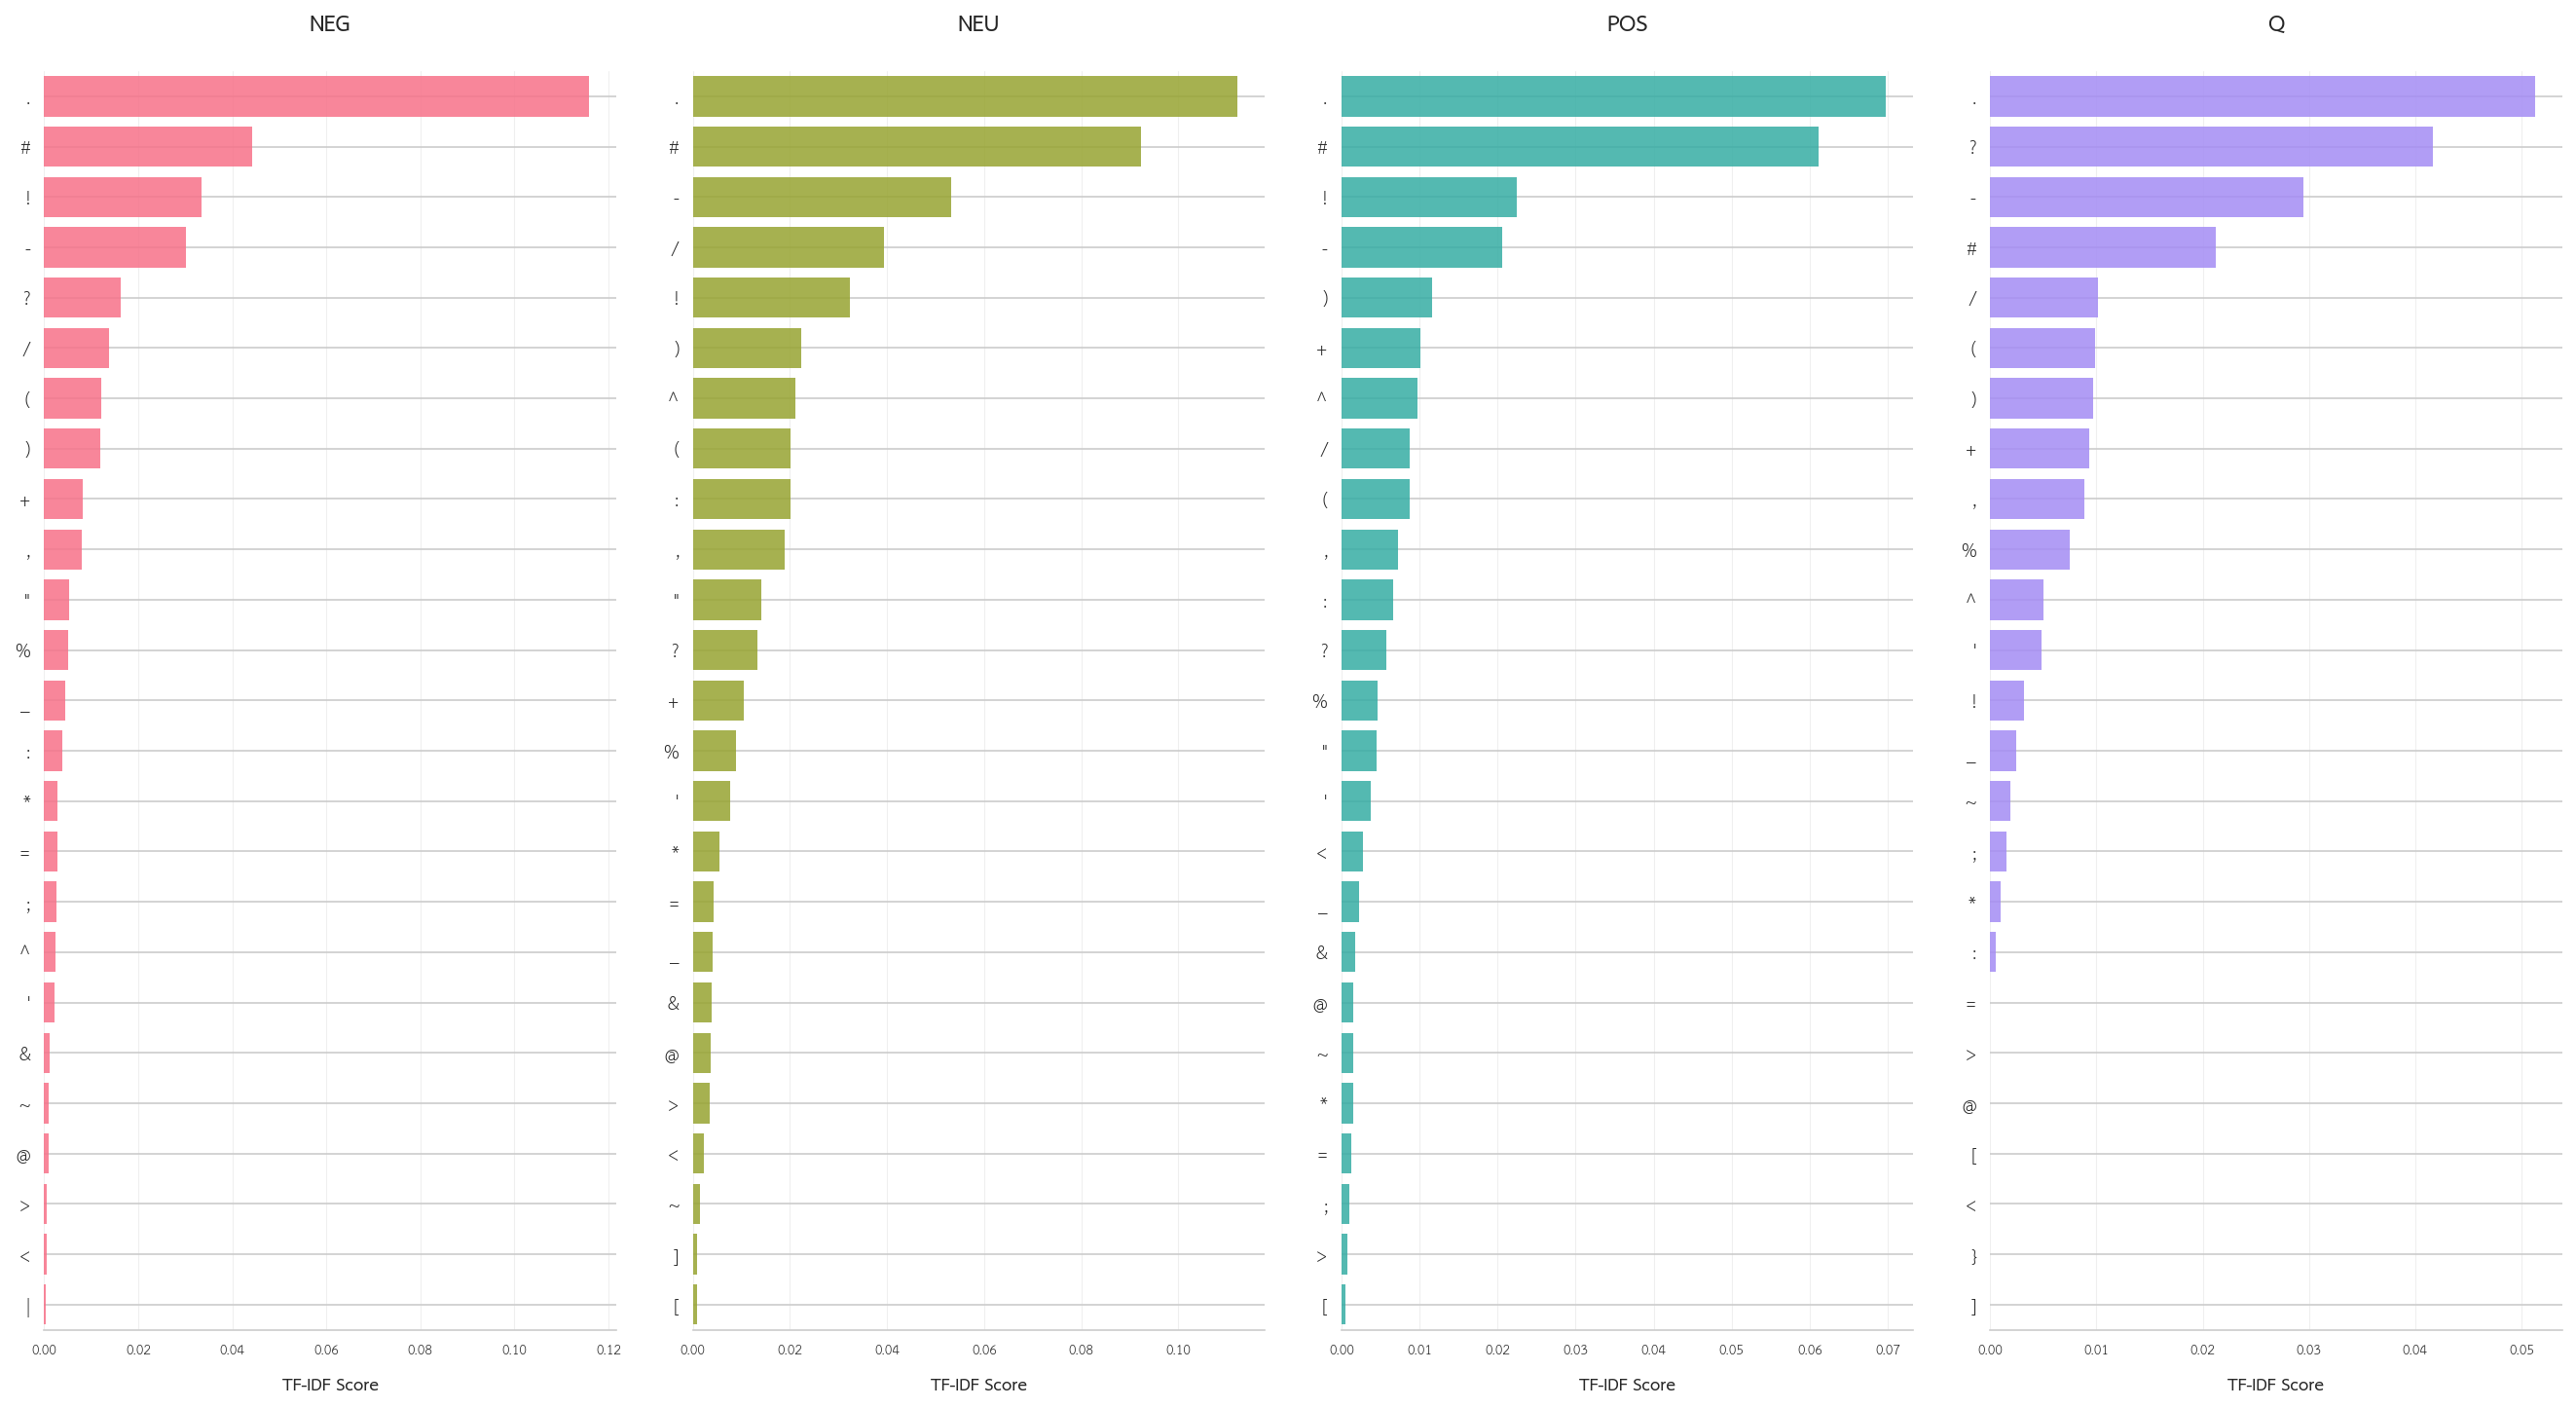

In [73]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_punc)

### URLs

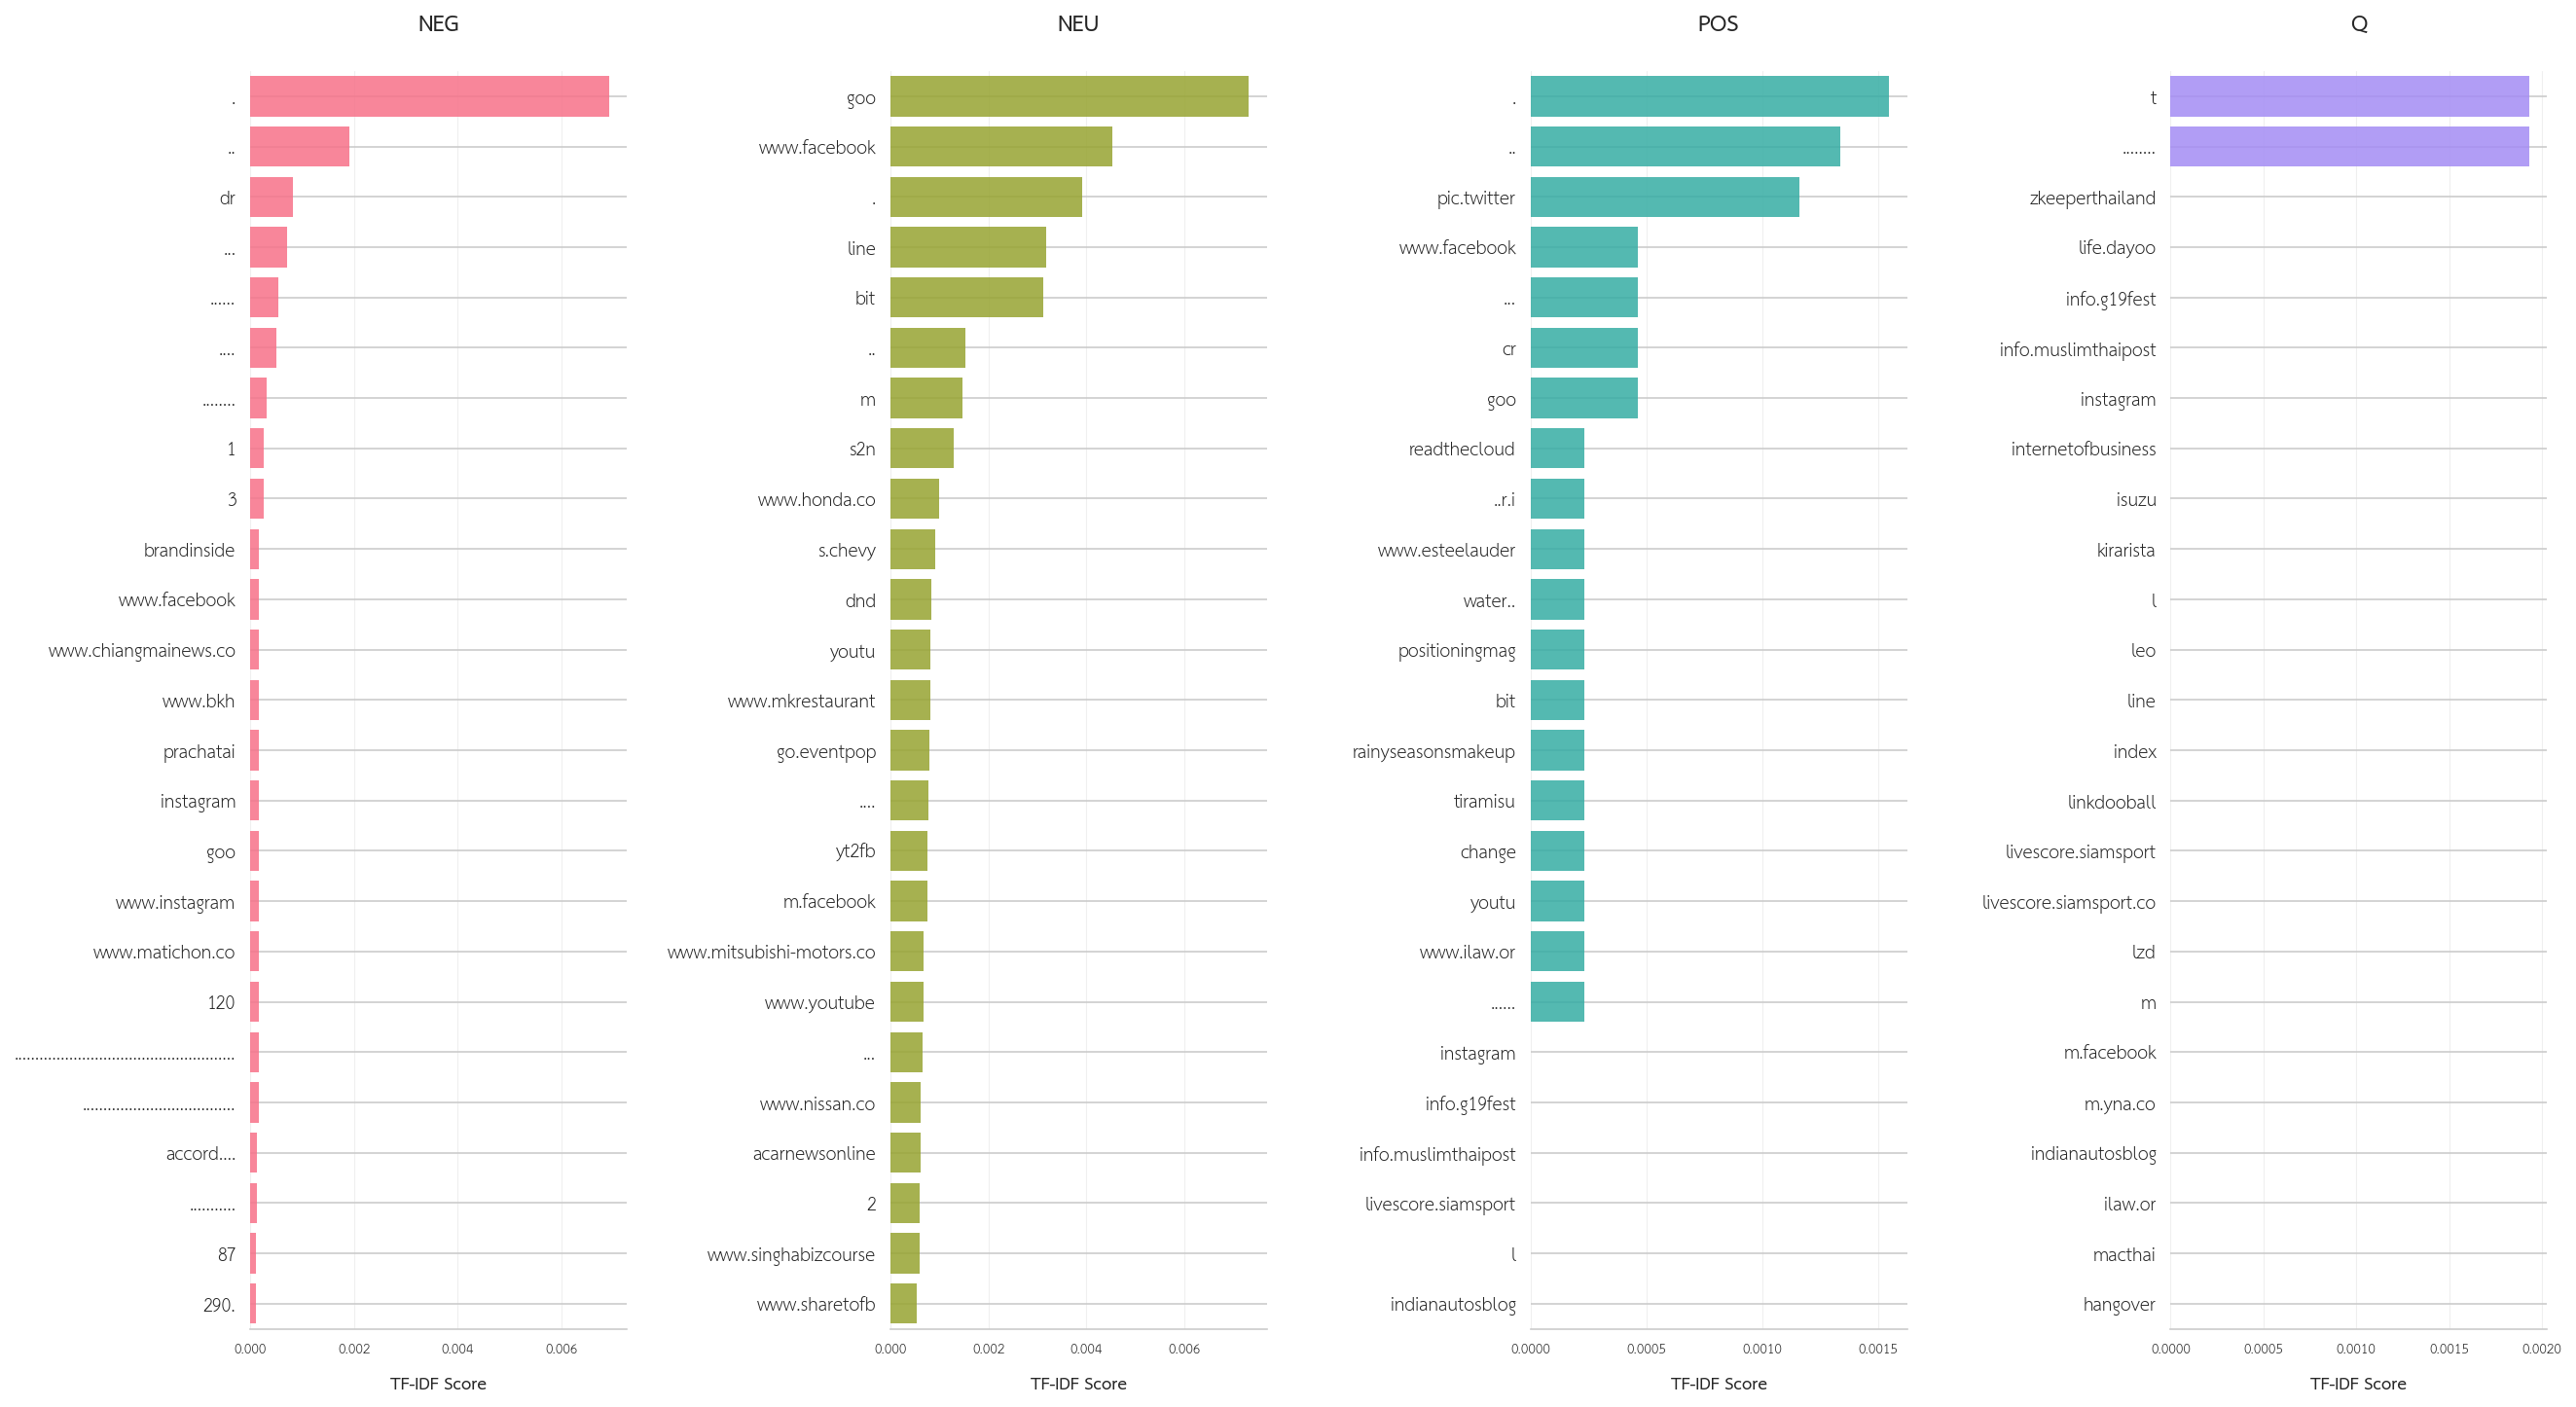

In [74]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_url)

### Hashtags

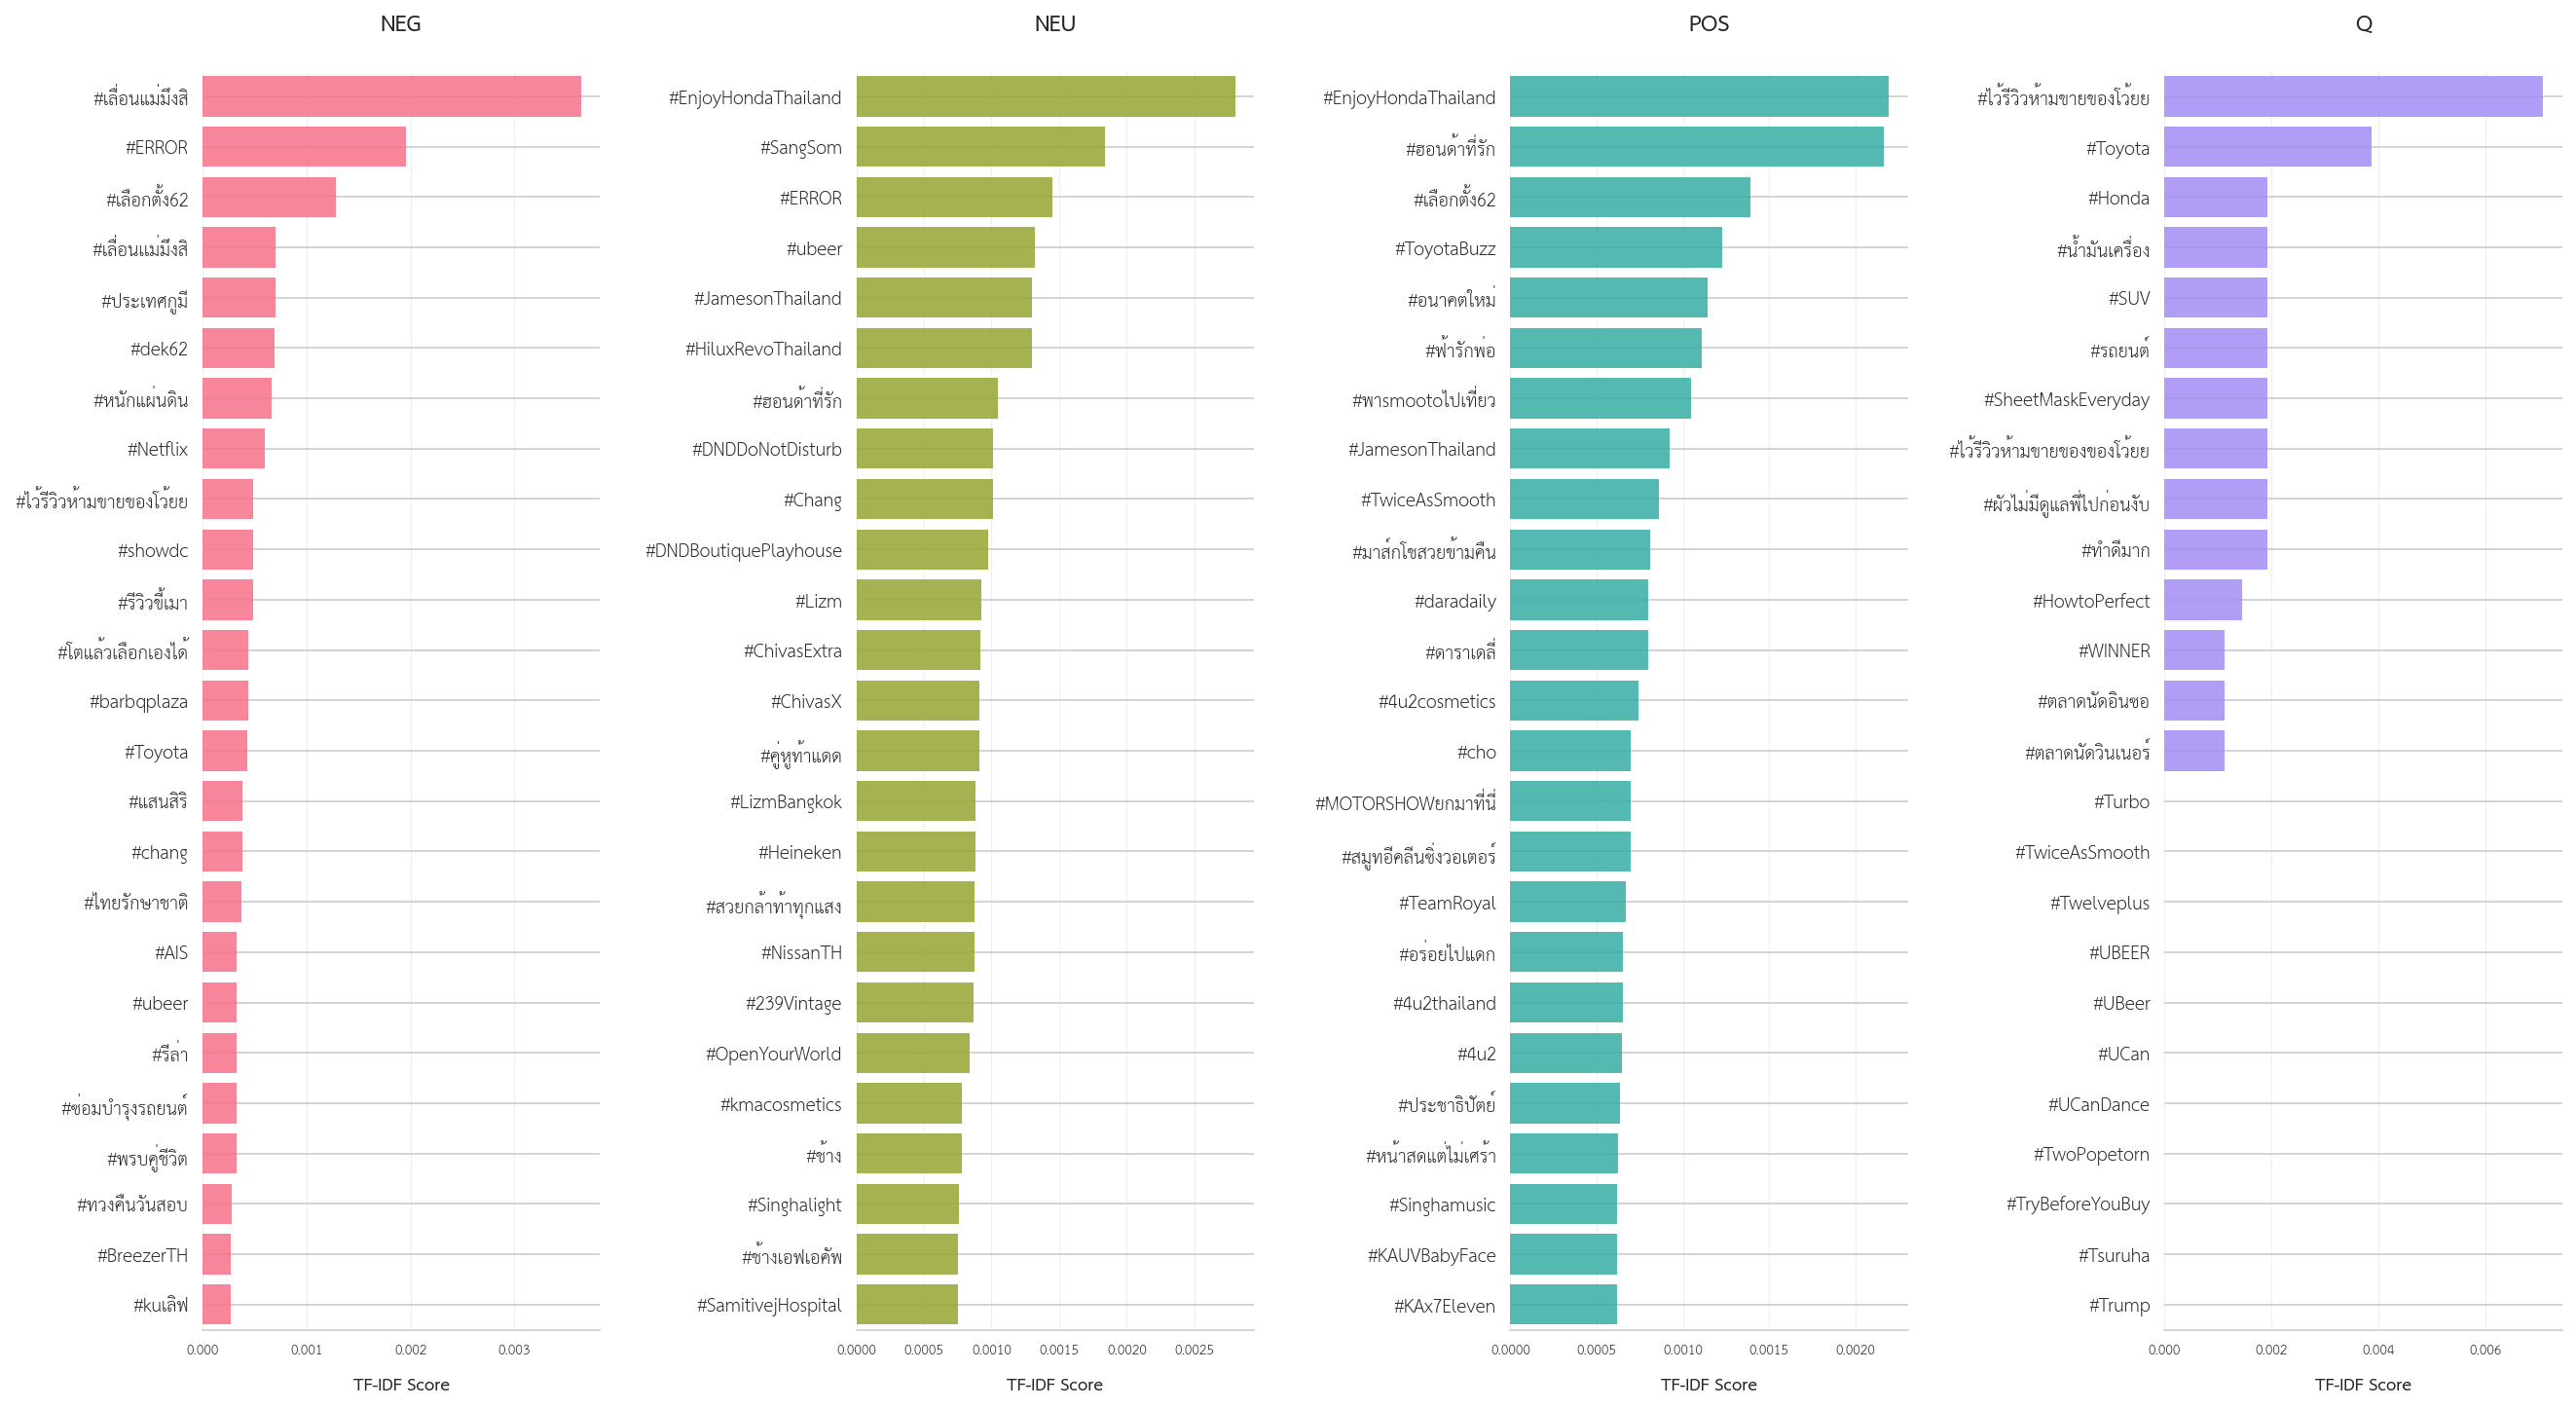

In [75]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_hashtags)

# Neutral, Positive, Negative

In [76]:
neu_df = df[df.category == "neu"]
pos_df = df[df.category == "pos"]
neg_df = df[df.category == "neg"]

In [77]:
sentiment_df = pd.concat([neg_df, pos_df, neu_df])
sentiment_df = sentiment_df.reset_index(drop=True)
sentiment_df.groupby("category").texts.describe()

count unique                        top freq
category                                              
neg       6140   6129   #ERROR!                    12 
neu       13105  13087  #ERROR!                    19 
pos       4300   4300   สนใจ ฟอจูนเนอร์ สีขาวครับ  1

In [101]:
#sentiment_df.to_csv("dataset1.csv", index=False)
sentiment_df.head()

category  \
0  neg       
1  neg       
2  neg       
3  neg       
4  neg       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    texts  \
0  อิเหี้ยออมทำกูอยากกินเอ็มเค                                                                                                                                                                                                                                                                                                                                                                                                                                              
1  เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีนานๆไปเเย่ขึ้นเรื่อยๆกากกว่าเน็ตค่ายอื่นอ่ะบอกจริงไม่สนหรอกว่าจะเป็นเด็กเเล้วเม้นด่าเเบบนี้ เเต่นี้หาตังค์จ่ายค่าเน็ตมาตลอดเหนื่อยน่ะเล่นเกมส์ไปเดี่ยวก็หายกากเกินติดตั้งโปรพิเศษ100Mเเต่พอวัดดูปล่อยไม่ถึงเท่าที่ตกลงกันไว้พอโทรไปเเจ้งก็ปล่อยมาเต็มไม่กี่วันก็เหมื่อนเดิมใบเเจ้งก็มาย้อนหลัง3เดือนทุกครั้งห่วยไปน่ะบางทีโปร100M/700 กว่าบาทเเต่คุณภาพเเย่เสียดายตังค์   
2  เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ                                                                                                                                                                                                                                                                                                                                                                                                                                   
3  ลิปมันของเเบร์น Mistine ราคากลาง ๆ ไม่แพงมาก ราคาสามารถเอื้อมถึงได้ #LASHESactivity                                                                                                                                                                                                                                                                                                                                                                                      
4  ทำไมมันไม่มีโปรให้เร๊าาาาาา                                                                                                                                                                                                                                                                                                                                                                                                                                              

   length  
0  9       
1  127     
2  11      
3  23      
4  7

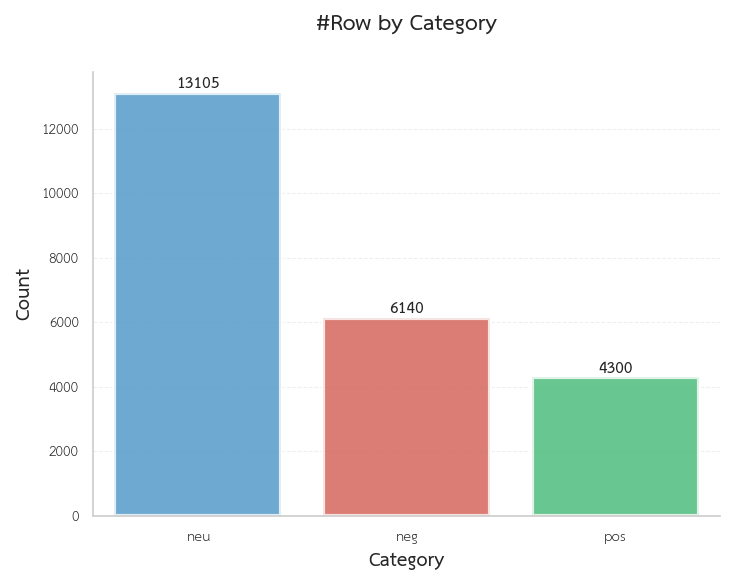

In [ ]:
count_data = sentiment_df.category.value_counts().reset_index()
count_data.columns = ['category', 'count']

fig, ax = plt.subplots(figsize=(5, 4), dpi=150)

sns.barplot(
    data=count_data,
    x='category',
    y='count',
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    hue= 'category',
    alpha=0.8,
    edgecolor='white',
    linewidth=2,
    ax=ax,
    legend=False
)

ax.set_xlabel('Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
ax.set_title('#Row by Category', fontsize=15, fontweight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

for i, row in count_data.iterrows():
    ax.text(i, row['count'] + 50, str(row['count']), 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

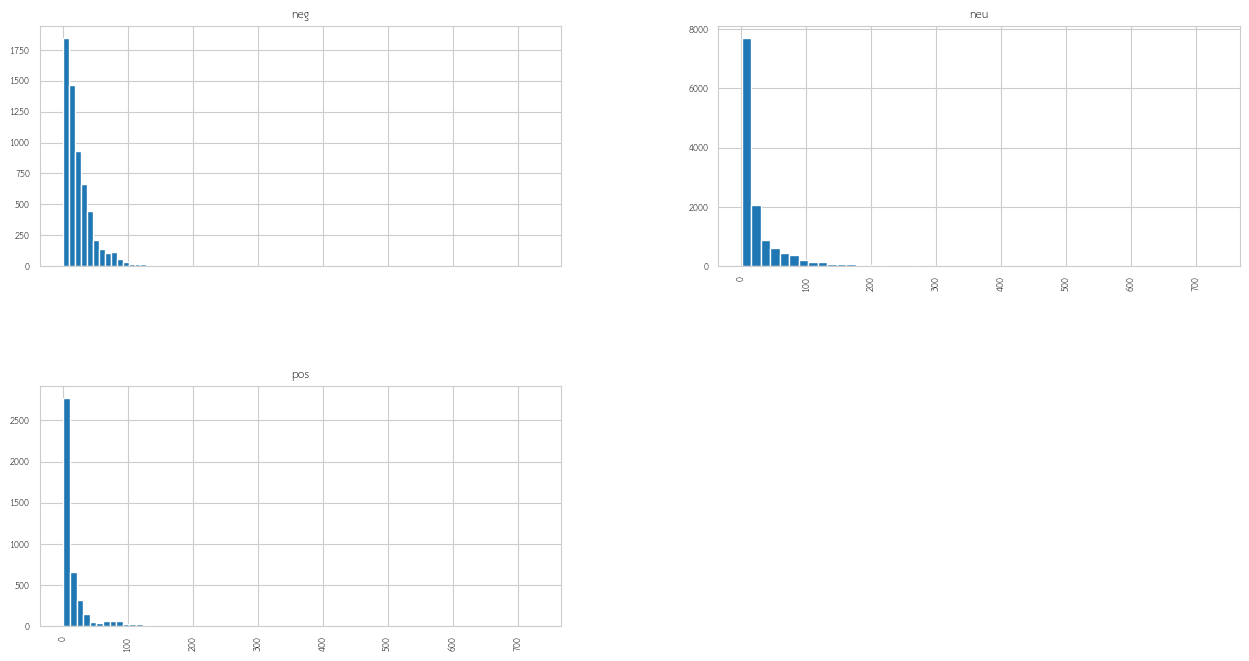

In [79]:
sentiment_df.hist(column="length", by="category", bins=50, figsize=(15, 8), sharex=True)
plt.show()

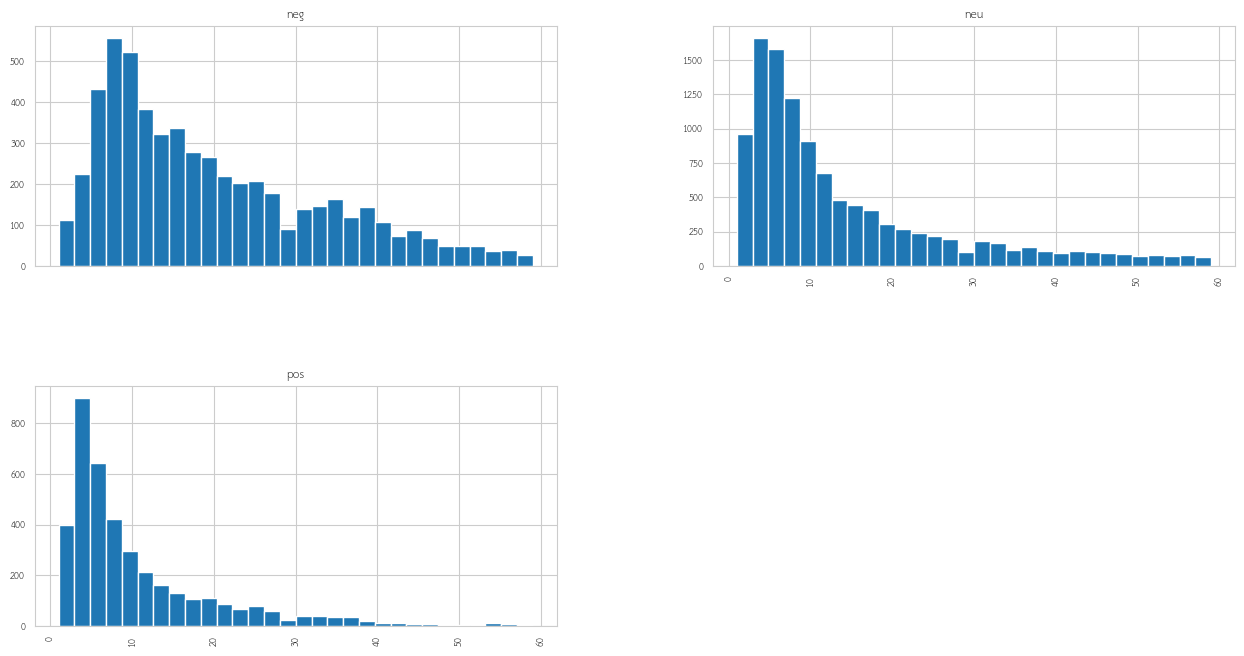

In [80]:
sentiment_df[sentiment_df.length < 60].hist(column="length", by="category", bins=30, figsize=(15, 8), sharex=True)
plt.show()

# Classification

In [81]:
class_names = np.unique(sentiment_df.category).tolist()

## Multinomial Naive Bayes

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentiment_df["texts"], sentiment_df["category"], test_size=0.20, random_state=42, stratify=sentiment_df["category"])

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18836,), (4709,), (18836,), (4709,))

In [84]:
print(X_train.head(), y_train.head())

18163    แปะไว้เผื่อใครเสพการเมืองแล้วเห็นชื่อคนคนนี้
16200    งง                                          
411      ไม่ๆ                                        
3800     กาก หว่ะ บักลิง                             
13504    ป๊า กิน Leo แต่ ยูโร ดื่ม Pepsi ครับ 😄😄😄    
Name: texts, dtype: object 18163    neu
16200    neu
411      neg
3800     neg
13504    neu
Name: category, dtype: object


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2),token_pattern=None)),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB(alpha=0.001)),
])

text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

0.6619239753663199

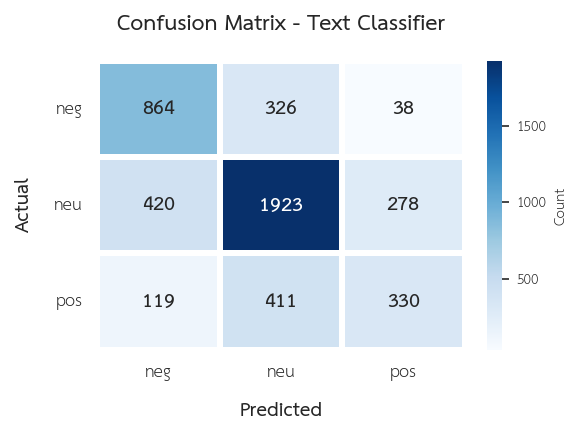

In [86]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = text_clf.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'})

plt.ylabel("Actual", fontsize=13, fontweight='bold', labelpad=10)
plt.xlabel("Predicted", fontsize=13, fontweight='bold', labelpad=10)
plt.title("Confusion Matrix - Text Classifier", fontsize=15, fontweight='bold', pad=15)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [87]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         neg       0.62      0.70      0.66      1228
         neu       0.72      0.73      0.73      2621
         pos       0.51      0.38      0.44       860

    accuracy                           0.66      4709
   macro avg       0.62      0.61      0.61      4709
weighted avg       0.66      0.66      0.66      4709



#### LIME Explainer

In [88]:
from lime.lime_text import LimeTextExplainer
from IPython.display import display, HTML

explainer = LimeTextExplainer(class_names=class_names,random_state=42)

In [97]:
idx = sentiment_df.sample(1).index[0]

explanation = explainer.explain_instance(sentiment_df.texts[idx], text_clf.predict_proba, num_features=5, top_labels=1)

predicted_label = text_clf.predict([sentiment_df.texts[idx]])[0]
label_idx = class_names.index(predicted_label)
display(HTML(explanation.as_html()))

In [98]:
sentiment_df.iloc[idx]

category    neg                        
texts       นาวาร่าเพลาเดิมอีกเสียงครับ
length      7                          
Name: 5218, dtype: object

In [99]:
def predict_proba_wrapper(texts):
    """LIME needs probabilities for all classes"""
    return text_clf.predict_proba(texts)

text_to_explain = "อาหารอร่อยมาก บริการดีเยี่ยม"

explanation = explainer.explain_instance(
    text_to_explain,
    predict_proba_wrapper,
    num_features=10,
    num_samples=5000
)

prediction = text_clf.predict([text_to_explain])[0]
probabilities = text_clf.predict_proba([text_to_explain])[0]

display(HTML(explanation.as_html()))

## Linear SVC

In [92]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svc_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2), token_pattern=None)),
    ("tfidf", TfidfTransformer()),
    ("clf", LinearSVC()),
])

svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.7258441282650244

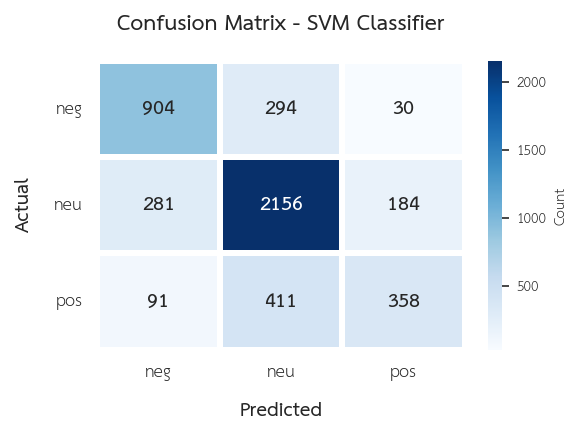

In [93]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = svc_clf.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'})

plt.ylabel("Actual", fontsize=13, fontweight='bold', labelpad=10)
plt.xlabel("Predicted", fontsize=13, fontweight='bold', labelpad=10)
plt.title("Confusion Matrix - SVM Classifier", fontsize=15, fontweight='bold', pad=15)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [94]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         neg       0.71      0.74      0.72      1228
         neu       0.75      0.82      0.79      2621
         pos       0.63      0.42      0.50       860

    accuracy                           0.73      4709
   macro avg       0.70      0.66      0.67      4709
weighted avg       0.72      0.73      0.72      4709

